# **Recommendation System Analysis and Modelling**
 
## **Business Understanding**  

## **1. Background of the Project**  
In today’s digital economy, businesses increasingly rely on **recommendation systems** to provide personalized experiences. These systems analyze user interactions to suggest relevant products, content, or services, improving engagement, satisfaction, and sales.  

E-commerce platforms, streaming services, and subscription-based businesses depend on accurate recommendations to retain users and increase conversions. However, ensuring that recommendations are **accurate, diverse, and relevant** while managing large-scale data presents a significant challenge.  

This project aims to develop a **Recommendation System** that leverages user behavior data to generate **personalized suggestions** across different domains. The system will analyze past interactions to predict user preferences, ultimately enhancing the user experience and business performance.  

## **2. Business Objectives**  
The key objectives of this project are:  
- **Improve Recommendation Accuracy**: Increase relevance in product suggestions.  
- **Boost Conversion Rates**: Enhance purchases through personalized recommendations.  
- **Filter Abnormal Users**: Remove bot interactions to improve data quality.  
- **Optimize for Scalability**: Handle large datasets efficiently.  
- **Balance Diversity and Relevance**: Prevent recommendation loops.  

## **3. Scope of the Project**  
This recommendation system will be designed for:  
- **E-commerce platforms**: Suggesting products based on past browsing and purchases.  
- **Streaming services**: Recommending movies, shows, or music based on user preferences.  
- **Subscription-based platforms**: Offering personalized content or services.  

The system will focus on:  
- **Data Cleaning & Preprocessing**: Handling missing values and filtering abnormal users.  
- **Feature Engineering**: Extracting meaningful insights from user interactions.  
- **Model Development**: Implementing collaborative filtering, content-based filtering, and hybrid methods.  
- **Evaluation & Optimization**: Measuring accuracy, diversity, and performance.  

## **4. Problem Statement**  
Many businesses struggle to provide effective personalized recommendations due to:  
- **Large Data Volumes**: Handling millions of interactions efficiently.  
- **Low Recommendation Accuracy**: Poorly optimized models leading to irrelevant suggestions.  
- **Cold Start Problem**: Difficulty recommending items to new users with no history.  
- **Lack of Diversity**: Recommender loops that limit content variety.  
- **Fraudulent & Abnormal User Activity**: Bots and fake accounts adding noise to the system.  

This project will address these challenges by developing a **scalable, high-accuracy recommendation system** capable of **filtering abnormal user activity**, optimizing recommendations, and balancing accuracy with diversity.  

## **5. Key Challenges**
Developing an effective recommendation system comes with challenges, including:
- **Handling Large-Scale Data**: Processing millions of interactions efficiently.
- **Ensuring Accuracy & Relevance**: Providing meaningful recommendations without overwhelming users.
- **Personalization Without Bias**: Avoiding recommendation loops that limit content diversity.
- **Filtering Abnormal Users**: Identifying and removing fraudulent or non-human interactions

## **6. Stakeholders**
- **E-commerce Businesses**: Looking to improve product recommendations for increased sales.
- **Streaming & Media Platforms**: Seeking to provide engaging content suggestions.
- **Subscription-Based Services**: Aiming to personalize offerings to retain users.
- **Data Scientists & Analysts**: Responsible for model development and optimization.

## **7. Features of the Dataset**  
The dataset contains user interactions and product information from an **e-commerce website**, including:  

### **A. events.csv (User Behavior Data)**  
- **visitor_id** – Unique identifier for each user.  
- **timestamp** – Time of the event (Unix format).  
- **event_type** – Type of user interaction:  
  - `view` – User viewed a product.  
  - `addtocart` – User added a product to their cart.  
  - `transaction` – User purchased a product.  
- **item_id** – Unique identifier for each product.  

### **B. item_properties.csv (Product Details)**  
- **item_id** – Product identifier.  
- **timestamp** – Time at which item properties were recorded.  
- **property** – Various features such as price, brand, category, etc.  
- **value** – Corresponding values for each property.  

### **C. category_tree.csv (Product Hierarchy)**  
- **child_category_id** – ID of the subcategory.  
- **parent_category_id** – ID of the parent category (if applicable).   

## **8. Hypothesis**  
To guide the analysis, we define the following hypotheses:  

1. **H1: Users who add items to their cart are more likely to purchase those items compared to those who only view them.**  
2. **H2: Users who interact with multiple product categories tend to have higher engagement and conversion rates.**  
3. **H3: Recommendation accuracy improves when abnormal users (bots, fraudulent accounts) are filtered out.**  
4. **H4: Products frequently viewed together are strong indicators for collaborative filtering recommendations.**  
5. **H5: A well-balanced recommendation system (mixing popular and diverse items) leads to higher user retention.**  
6. **H6: Personalization increases the average transaction value, as users are more likely to purchase recommended items.**  
7. **H7: Seasonal trends and time-based factors influence product recommendations (e.g., holiday sales impact purchasing behavior).** 

## **9. Analytical Questions**  
1. **What patterns exist in user behavior across different events (views, add-to-cart, transactions)?**  
2. **How does user engagement (clicks, time spent, interactions) influence purchase decisions?**  
3. **Which product categories receive the most engagement, and how does this influence recommendations?**  
4. **What are the key features that impact the likelihood of a product being added to the cart or purchased?**  
5. **How can abnormal user activity (e.g., bots, fraud) be detected and filtered out?**  
6. **What is the impact of personalization on user retention and conversion rates?**  
7. **How can the recommendation system balance accuracy and diversity to avoid content redundancy?**  

### **1. Data Loading and Initial Exploration**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json5
import datasist as ds
import gc

gc.collect()  # Force garbage collection


20

In [2]:
# Load datasets
category_tree = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\Recommendation-System-Analysis\\Notebook\\Data\\category_tree.csv")
events = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\Recommendation-System-Analysis\\Notebook\\Data\\events.csv")
item_properties1 = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\Recommendation-System-Analysis\\Notebook\\Data\\item_properties_part1.1.csv")
item_properties2 = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\Recommendation-System-Analysis\\Notebook\\Data\\item_properties_part2.csv")

In [3]:
# Display basic information for each dataset
category_tree, category_tree.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


(      categoryid  parentid
 0           1016     213.0
 1            809     169.0
 2            570       9.0
 3           1691     885.0
 4            536    1691.0
 ...          ...       ...
 1664          49    1125.0
 1665        1112     630.0
 1666        1336     745.0
 1667         689     207.0
 1668         761     395.0
 
 [1669 rows x 2 columns],
 None)

In [4]:
events, events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


(             timestamp  visitorid event  itemid  transactionid
 0        1433221332117     257597  view  355908            NaN
 1        1433224214164     992329  view  248676            NaN
 2        1433221999827     111016  view  318965            NaN
 3        1433221955914     483717  view  253185            NaN
 4        1433221337106     951259  view  367447            NaN
 ...                ...        ...   ...     ...            ...
 2756096  1438398785939     591435  view  261427            NaN
 2756097  1438399813142     762376  view  115946            NaN
 2756098  1438397820527    1251746  view   78144            NaN
 2756099  1438398530703    1184451  view  283392            NaN
 2756100  1438400163914     199536  view  152913            NaN
 
 [2756101 rows x 5 columns],
 None)

In [5]:
item_properties1, item_properties1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


(              timestamp  itemid    property                            value
 0         1435460400000  460429  categoryid                             1338
 1         1441508400000  206783         888          1116713 960601 n277.200
 2         1439089200000  395014         400  n552.000 639502 n720.000 424566
 3         1431226800000   59481         790                       n15360.000
 4         1431831600000  156781         917                           828513
 ...                 ...     ...         ...                              ...
 10999994  1439694000000   86599  categoryid                              618
 10999995  1435460400000  153032        1066                 n1020.000 424566
 10999996  1440298800000  421788         888               35975 856003 37346
 10999997  1437879600000  159792         400  n552.000 639502 n720.000 424566
 10999998  1436065200000  464846         790                      n410640.000
 
 [10999999 rows x 4 columns],
 None)

In [6]:
item_properties2, item_properties2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


(             timestamp  itemid property                             value
 0        1433041200000  183478      561                            769062
 1        1439694000000  132256      976                   n26.400 1135780
 2        1435460400000  420307      921                   1149317 1257525
 3        1431831600000  403324      917                           1204143
 4        1435460400000  230701      521                            769062
 ...                ...     ...      ...                               ...
 9275898  1433646000000  236931      929                           n12.000
 9275899  1440903600000  455746        6                     150169 639134
 9275900  1439694000000  347565      686                            610834
 9275901  1433646000000  287231      867                            769062
 9275902  1442113200000  275768      888  888666 n10800.000 746840 1318567
 
 [9275903 rows x 4 columns],
 None)

### **2. Data Preprocessing**

In [7]:
# Merging both item_properties datasets
item_properties = pd.concat([item_properties1, item_properties2], ignore_index=True)


In [8]:
# Converting timestamp to datetime format
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')
item_properties['timestamp'] = pd.to_datetime(item_properties['timestamp'], unit='ms')

In [9]:
# Mergeing events with item_properties
merged = pd.merge(events, item_properties, on='itemid', how='left')

In [10]:
# Check the event distribution after merging
print("Event distribution after merging:")
print(merged['event'].value_counts())

Event distribution after merging:
event
view           164072111
addtocart        5111731
transaction      1613853
Name: count, dtype: int64


In [11]:
merged.head()

,timestamp_x,visitorid,event,itemid,transactionid,timestamp_y,property,value
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-05-17 03:00:00,159,519769
1,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-05-17 03:00:00,available,1
2,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-08-30 03:00:00,available,1
3,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-07-05 03:00:00,available,1
4,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-07-26 03:00:00,available,1


In [12]:
# Drop only NaN in specific columns
columns_to_check = ['itemid', 'visitorid', 'event', 'timestamp_x', 'timestamp_y', 'property']
merged = merged.dropna(subset=columns_to_check)

In [13]:
# Check the event distribution after dropping NaNs
print("\nEvent distribution after dropping NaNs:")
print(merged['event'].value_counts())


Event distribution after dropping NaNs:
event
view           163817834
addtocart        5110898
transaction      1613378
Name: count, dtype: int64


In [14]:
# Convert category IDs to string and merge with category tree
merged['property'] = merged['property'].astype(str)
category_tree['categoryid'] = category_tree['categoryid'].astype(str)
dataset = merged.merge(category_tree, left_on="property", right_on="categoryid", how="left")

In [15]:
# Clean up columns
dataset.drop(columns=["property"], inplace=True)
dataset.rename(columns={"categoryid": "category_id"}, inplace=True)

In [16]:
# Check for any remaining null values
print("\nRemaining null values:")
print(dataset.isnull().sum())


Remaining null values:
timestamp_x              0
visitorid                0
event                    0
itemid                   0
transactionid    168928732
timestamp_y              0
value                    0
category_id       29717704
parentid          30184661
dtype: int64


In [17]:
# Display the final shape of the dataset
print("\nFinal dataset shape:", dataset.shape)


Final dataset shape: (170542110, 9)


In [18]:
# Display the final event distribution
print("\nFinal event distribution:")
print(dataset['event'].value_counts())


Final event distribution:
event
view           163817834
addtocart        5110898
transaction      1613378
Name: count, dtype: int64


In [19]:
dataset

,timestamp_x,visitorid,event,itemid,transactionid,timestamp_y,value,category_id,parentid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-05-17 03:00:00,519769,159,1028.0
1,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-05-17 03:00:00,1,NaN,NaN
2,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-08-30 03:00:00,1,NaN,NaN
3,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-07-05 03:00:00,1,NaN,NaN
4,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-07-26 03:00:00,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
170542105,2015-08-01 03:36:03.914,199536,view,152913,NaN,2015-05-10 03:00:00,469,NaN,NaN
170542106,2015-08-01 03:36:03.914,199536,view,152913,NaN,2015-05-31 03:00:00,3199,839,33.0
170542107,2015-08-01 03:36:03.914,199536,view,152913,NaN,2015-05-31 03:00:00,1285872,764,1370.0
170542108,2015-08-01 03:36:03.914,199536,view,152913,NaN,2015-05-10 03:00:00,300737,917,1374.0


### **3. Exploratory Data Analysis**

In [20]:
# Apply chunking to dataset 
sample_size = 100000  # Adjust based on your system's capacity
sample_data = dataset.sample(n=sample_size, random_state=42)

print(f"Original dataset shape: {dataset.shape}")
print(f"Sampled dataset shape: {sample_data.shape}")

Original dataset shape: (170542110, 9)
Sampled dataset shape: (100000, 9)


In [22]:
# Basic statistics for numerical columns
dataset.describe()

,timestamp_x,visitorid,itemid,transactionid,timestamp_y,parentid
count,170542110,1.705421e+08,1.705421e+08,1.613378e+06,170542110,1.403574e+08
mean,2015-07-08 11:44:36.856280832,7.014980e+05,2.355627e+05,8.829614e+03,2015-07-01 05:21:59.468576256,9.728998e+02
min,2015-05-03 03:00:04.384000,0.000000e+00,3.000000e+00,0.000000e+00,2015-05-10 03:00:00,8.000000e+00
25%,2015-06-04 18:05:42.592000,3.499260e+05,1.182150e+05,4.393000e+03,2015-05-31 03:00:00,7.110000e+02
50%,2015-07-08 16:08:38.212000,7.013260e+05,2.374220e+05,8.819000e+03,2015-06-28 03:00:00,9.330000e+02
75%,2015-08-08 21:20:09.828000,1.052955e+06,3.520420e+05,1.324500e+04,2015-08-09 03:00:00,1.492000e+03
max,2015-09-18 02:59:47.788000,1.407579e+06,4.668640e+05,1.767100e+04,2015-09-13 03:00:00,1.698000e+03
std,NaN,4.058720e+05,1.345122e+05,5.108600e+03,NaN,4.755615e+02


In [23]:
# Data types and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170542110 entries, 0 to 170542109
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp_x    datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   timestamp_y    datetime64[ns]
 6   value          object        
 7   category_id    object        
 8   parentid       float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 11.4+ GB


In [24]:
# Unique values in categorical columns
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(dataset[col].value_counts().head())


Unique values in event:
event
view           163817834
addtocart        5110898
transaction      1613378
Name: count, dtype: int64

Unique values in value:
value
1          13335402
769062     10662338
0           9096332
1285872     2500516
679677      2500516
Name: count, dtype: int64

Unique values in category_id:
category_id
790    29749086
888    23471875
283     3858683
400     3649328
776     3529132
Name: count, dtype: int64


#### **a. Event Distribution Analysis**

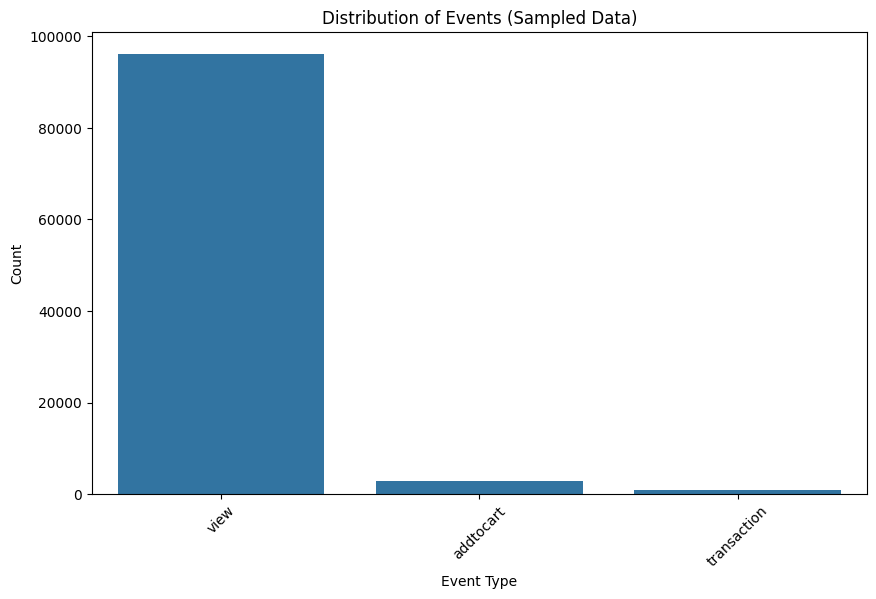

In [26]:
# Event distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_data, x='event')
plt.title("Distribution of Events (Sampled Data)")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Event distribution percentages for full dataset
event_dist = dataset['event'].value_counts(normalize=True) * 100
print("Event Distribution (%):")
print(event_dist)

Event Distribution (%):
event
view           96.057117
addtocart       2.996854
transaction     0.946029
Name: proportion, dtype: float64


#### **b. Temporal Analysis**

In [29]:
# Examine both timestamp columns in the sample data
print("timestamp_x info:")
print(sample_data['timestamp_x'].describe())
print("\ntimestamp_y info:")
print(sample_data['timestamp_y'].describe())

timestamp_x info:
count                           100000
mean     2015-07-08 08:51:54.079079680
min         2015-05-03 03:04:35.972000
25%      2015-06-04 16:16:45.027000064
50%      2015-07-08 13:31:45.443500032
75%      2015-08-08 15:04:46.798749952
max         2015-09-18 02:55:11.474000
Name: timestamp_x, dtype: object

timestamp_y info:
count                        100000
mean     2015-07-01 03:58:14.880000
min             2015-05-10 03:00:00
25%             2015-05-31 03:00:00
50%             2015-06-28 03:00:00
75%             2015-08-09 03:00:00
max             2015-09-13 03:00:00
Name: timestamp_y, dtype: object


In [30]:
# Check if they're always the same or different in the sample
print("\nAre timestamps always equal?", (sample_data['timestamp_x'] == sample_data['timestamp_y']).all())


Are timestamps always equal? False


In [31]:
# If they're different, show some examples where they differ
if not (sample_data['timestamp_x'] == sample_data['timestamp_y']).all():
    print("\nExamples where timestamps differ:")
    print(sample_data[sample_data['timestamp_x'] != sample_data['timestamp_y']][['timestamp_x', 'timestamp_y']].head())


Examples where timestamps differ:
                     timestamp_x         timestamp_y
36066683 2015-06-29 19:57:49.151 2015-09-13 03:00:00
37314841 2015-07-01 00:04:36.279 2015-06-28 03:00:00
92920954 2015-05-05 19:49:44.790 2015-05-17 03:00:00
75191702 2015-09-05 03:12:16.501 2015-05-31 03:00:00
56812074 2015-08-18 20:30:26.024 2015-09-13 03:00:00


In [38]:
# Calculate time difference
sample_data['time_diff'] = sample_data['timestamp_y'] - sample_data['timestamp_x']
print(sample_data['time_diff'])

36066683      75 days 07:02:10.849000
37314841     -3 days +02:55:23.721000
92920954      11 days 07:10:15.210000
75191702    -98 days +23:47:43.499000
56812074      25 days 06:29:33.976000
                       ...           
45181038    -61 days +09:52:15.153000
91855746       5 days 08:08:35.344000
125938129     91 days 02:19:19.407000
139179538     37 days 00:18:11.454000
161372567   -56 days +03:41:22.776000
Name: time_diff, Length: 100000, dtype: timedelta64[ns]


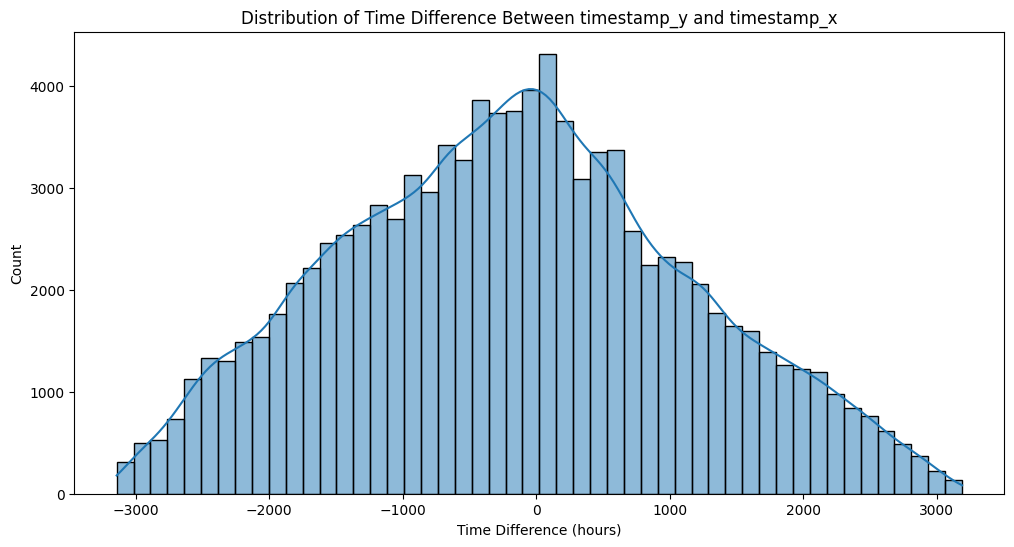

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(sample_data['time_diff'].dt.total_seconds() / 3600, bins=50, kde=True)
plt.title("Distribution of Time Difference Between timestamp_y and timestamp_x")
plt.xlabel("Time Difference (hours)")
plt.ylabel("Count")
plt.show()

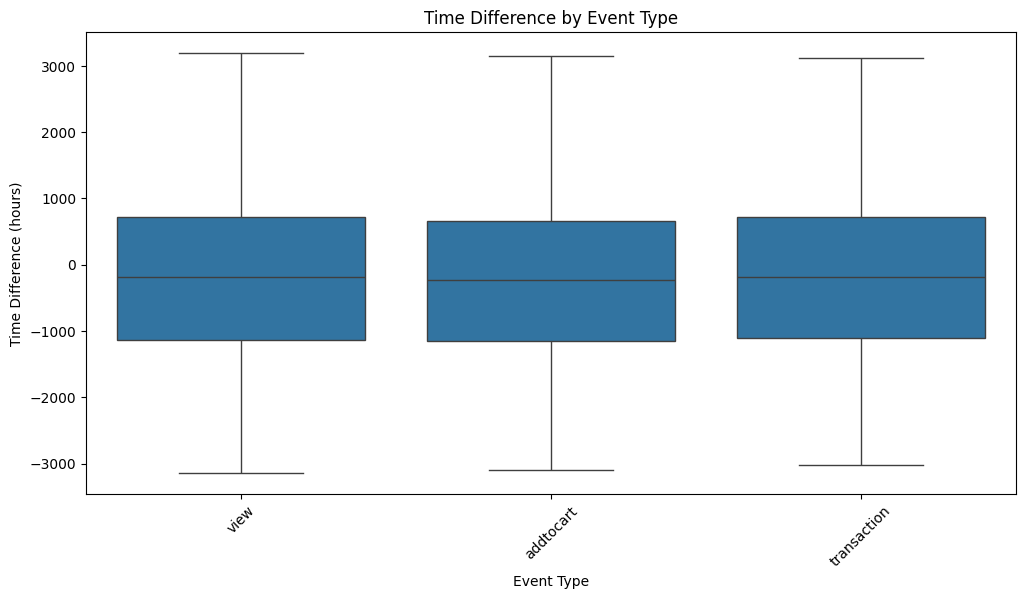

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='event', y=sample_data['time_diff'].dt.total_seconds() / 3600, data=sample_data)
plt.title("Time Difference by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Time Difference (hours)")
plt.xticks(rotation=45)
plt.show()

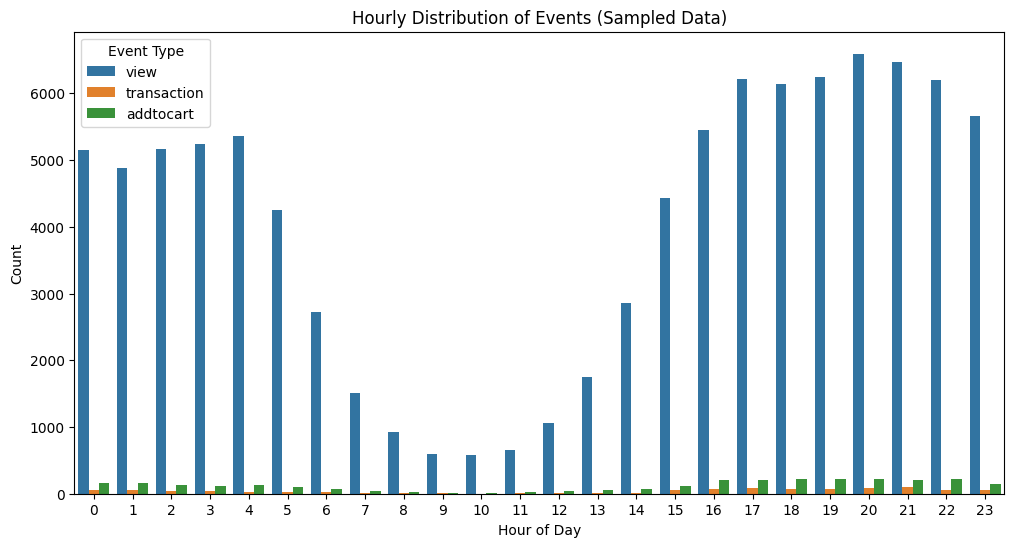

In [41]:
# Extract hour and day of week using timetsamp_x
sample_data['hour'] = sample_data['timestamp_x'].dt.hour
sample_data['day_of_week'] = sample_data['timestamp_x'].dt.dayofweek

# Hourly distribution of events
plt.figure(figsize=(12, 6))
sns.countplot(data=sample_data, x='hour', hue='event')
plt.title("Hourly Distribution of Events (Sampled Data)")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Event Type")
plt.show()

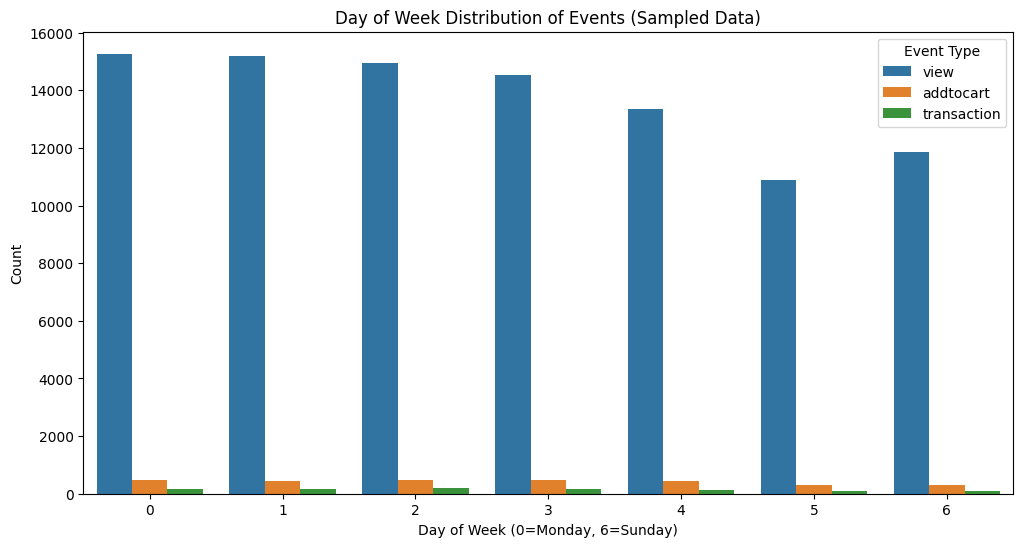

In [42]:
# Day of week distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=sample_data, x='day_of_week', hue='event')
plt.title("Day of Week Distribution of Events (Sampled Data)")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Count")
plt.legend(title="Event Type")
plt.show()

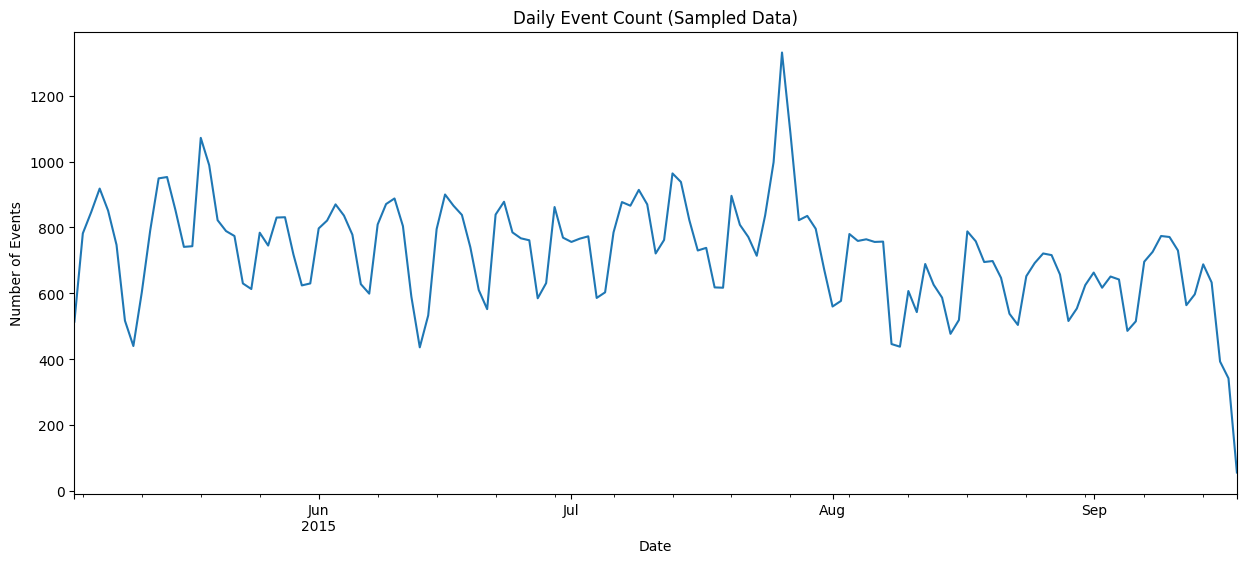

In [43]:
# Time series analysis
daily_events = sample_data.set_index('timestamp_x').resample('D')['event'].count()
plt.figure(figsize=(15, 6))
daily_events.plot()
plt.title("Daily Event Count (Sampled Data)")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.show()

#### **c. User Behaviour Analysis**

Average events per user:
event
addtocart      0.035145
transaction    0.011903
view           1.156538
dtype: float64


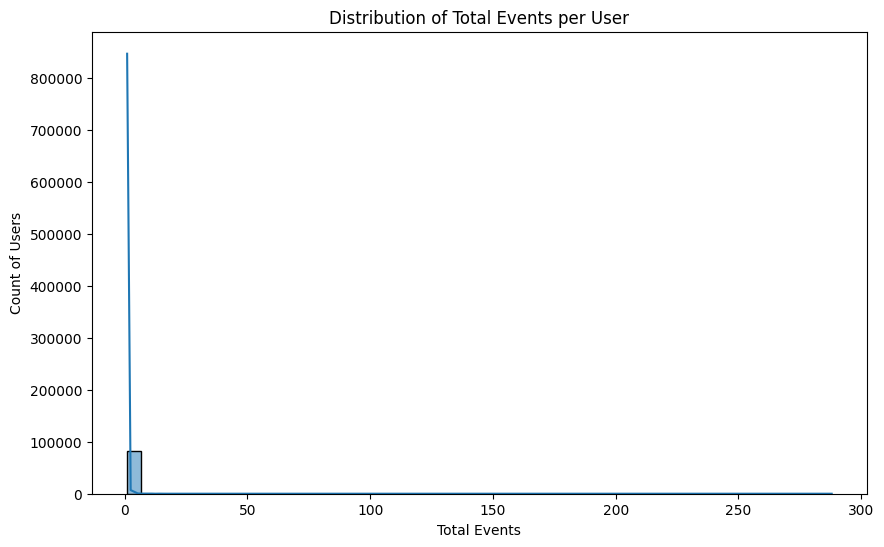

In [44]:
# User behavior analysis
user_event_counts = sample_data.groupby('visitorid')['event'].value_counts().unstack().fillna(0)
print("Average events per user:")
print(user_event_counts.mean())

# Distribution of total events per user
total_events_per_user = user_event_counts.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(total_events_per_user, bins=50, kde=True)
plt.title("Distribution of Total Events per User")
plt.xlabel("Total Events")
plt.ylabel("Count of Users")
plt.show()

#### **d. Item Analysis**

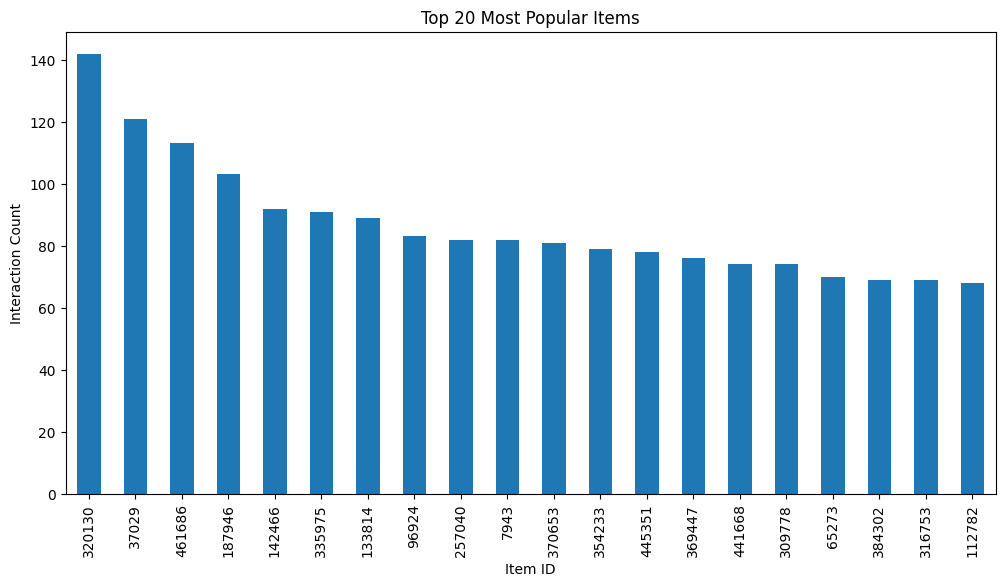

In [ ]:
# Most popular items
top_items = sample_data['itemid'].value_counts().head(20)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar')
plt.title("Top 20 Most Popular Items")
plt.xlabel("Item ID")
plt.ylabel("Interaction Count")
plt.xticks(rotation=90)
plt.show()

#### **e. Correlation Analysis**

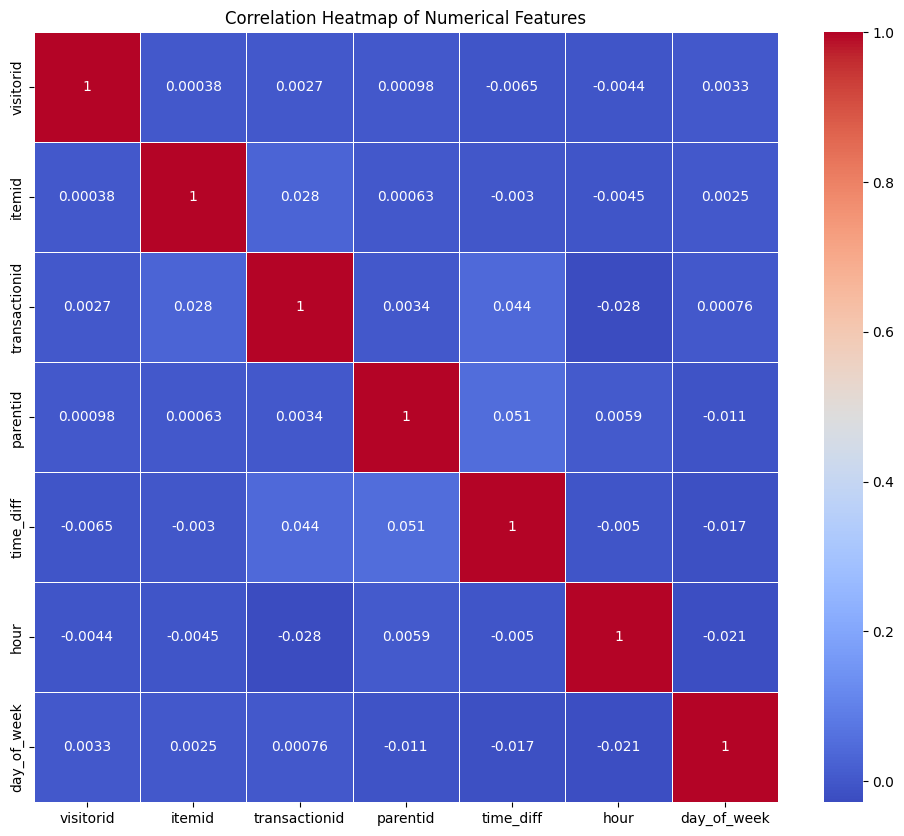

In [49]:
# Select numerical columns
numerical_cols = sample_data.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = sample_data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **4. Feature Engineering**